## Ejercicio 5

Considerar el conjunto de datos weather.csv. Se trata de los promedios mensuales de la temperatura (en Celsius) en 35
estaciones canadienses de monitoreo. El interés es comparar las estaciones entre sí con base en sus curvas de temperatura.


1. Interpretar y dibujar (como curva) los primeros dos componentes p1 y p2. Esto es, graficar {(i, p1i)} y {(i, p2i)}.


In [13]:
#Importar las librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
#import plotly

from mpl_toolkits.mplot3d import Axes3D

In [5]:
#Leer los datos

data = pd.read_csv('weather.csv', sep=',', header=0)
data.shape

(35, 13)

In [9]:
#Preparar los datos

numerical_values = data.values[:, :12].astype(np.float32) #Datos numéricos
station_names = data.values[:, 12] #Nombres de las estaciones


In [15]:
#Centrar y estandarizar los datos

mu = numerical_values.mean(axis=0)
std = numerical_values.std(axis=0)
Xc = (numerical_values - mu) / std

Xc.shape



(35, 12)

In [19]:
#Descomposición PCA

pcamodel = PCA(n_components=12)
pca2 = pcamodel.fit_transform(Xc)
pca2.shape

(35, 12)

[  1.0899692    1.8459749    2.1937068    1.8828608    2.329388
   2.013002     0.8748527    2.7137902    1.4554414   -3.7009304
   1.2520212   -0.48206088   3.11493      2.4461365    0.40763894
   3.1279294   -4.842056    -0.8582411    0.7583038   -0.53723615
   0.6241489   -0.18134208   0.6781099   -0.0594559    3.5311427
   0.4877447    1.720745     3.737458     3.6212122   -3.2135363
  -1.6809525   -6.4163494   -5.977823   -10.60945     -3.3470755 ]
[-1.8428096  -0.35333112 -0.44574806 -0.91578245 -1.4089671   0.35609195
  0.7759534   1.0980335   0.6744924  -0.46980453  0.24850102  0.69073004
  0.50535494  1.0911164   0.42033416  0.5358054  -0.23790927  1.380697
  1.7369676   1.2654088   1.328661   -0.14421664 -0.38341016  0.279346
  0.42083827 -0.77878064 -2.8579435  -1.6545839  -2.4208224   1.9103156
 -0.04548001 -1.5965099   1.090126   -2.0032957   1.7506213 ]


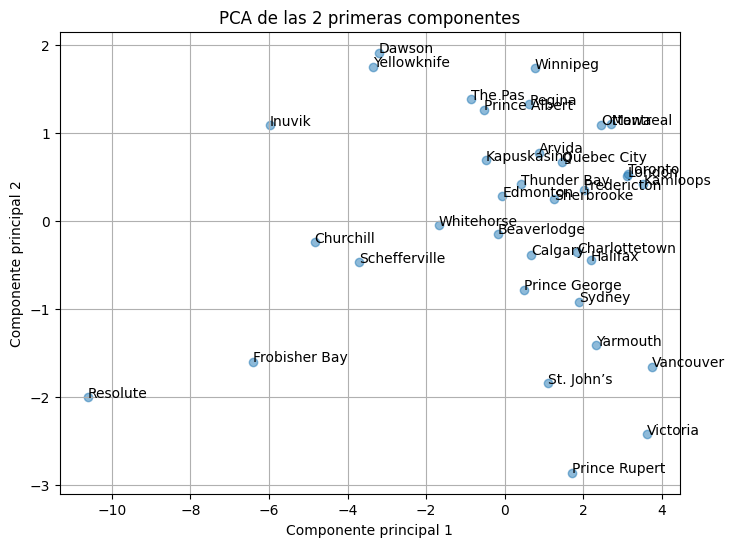

In [28]:
#Graficación de las 2 primeras componentes

component1 = pca2[:, 0] 
component2 = pca2[:, 1]  

print(component1)
print(component2)

plt.figure(figsize=(8, 6))
plt.scatter(component1, component2, alpha=0.5)
for i in range (0, len(station_names)):
    plt.annotate(station_names[i], xy=(component1[i], component2[i]))
plt.title('PCA de las 2 primeras componentes')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show()

<Axes: >

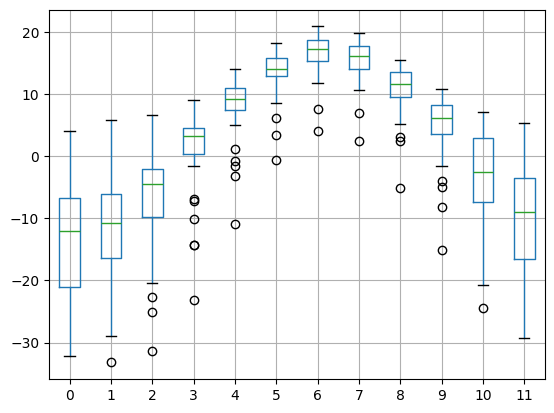

In [30]:
#Análisis para interpretación

data.boxplot()

In [31]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,-14.171429,-11.842857,-6.942857,0.90000,7.974286,13.431429,16.442857,15.354286,10.454286,4.368571,-3.400000,-10.625714
std,9.654672,9.236255,8.636015,7.08258,5.245578,4.050474,3.590042,3.702491,4.355074,5.702464,7.734339,8.962023
min,-32.100000,-33.200000,-31.400000,-23.10000,-10.900000,-0.600000,4.100000,2.400000,-5.100000,-15.100000,-24.500000,-29.300000
25%,-21.100000,-16.350000,-9.850000,0.40000,7.500000,12.900000,15.300000,14.100000,9.600000,3.650000,-7.350000,-16.550000
50%,-12.100000,-10.800000,-4.500000,3.20000,9.300000,14.100000,17.300000,16.100000,11.600000,6.100000,-2.600000,-9.000000
75%,-6.650000,-6.100000,-2.050000,4.50000,10.950000,15.900000,18.650000,17.800000,13.550000,8.250000,3.000000,-3.500000
max,4.100000,5.800000,6.700000,9.10000,14.100000,18.300000,20.900000,19.800000,15.500000,10.800000,7.200000,5.300000


<Figure size 800x800 with 0 Axes>

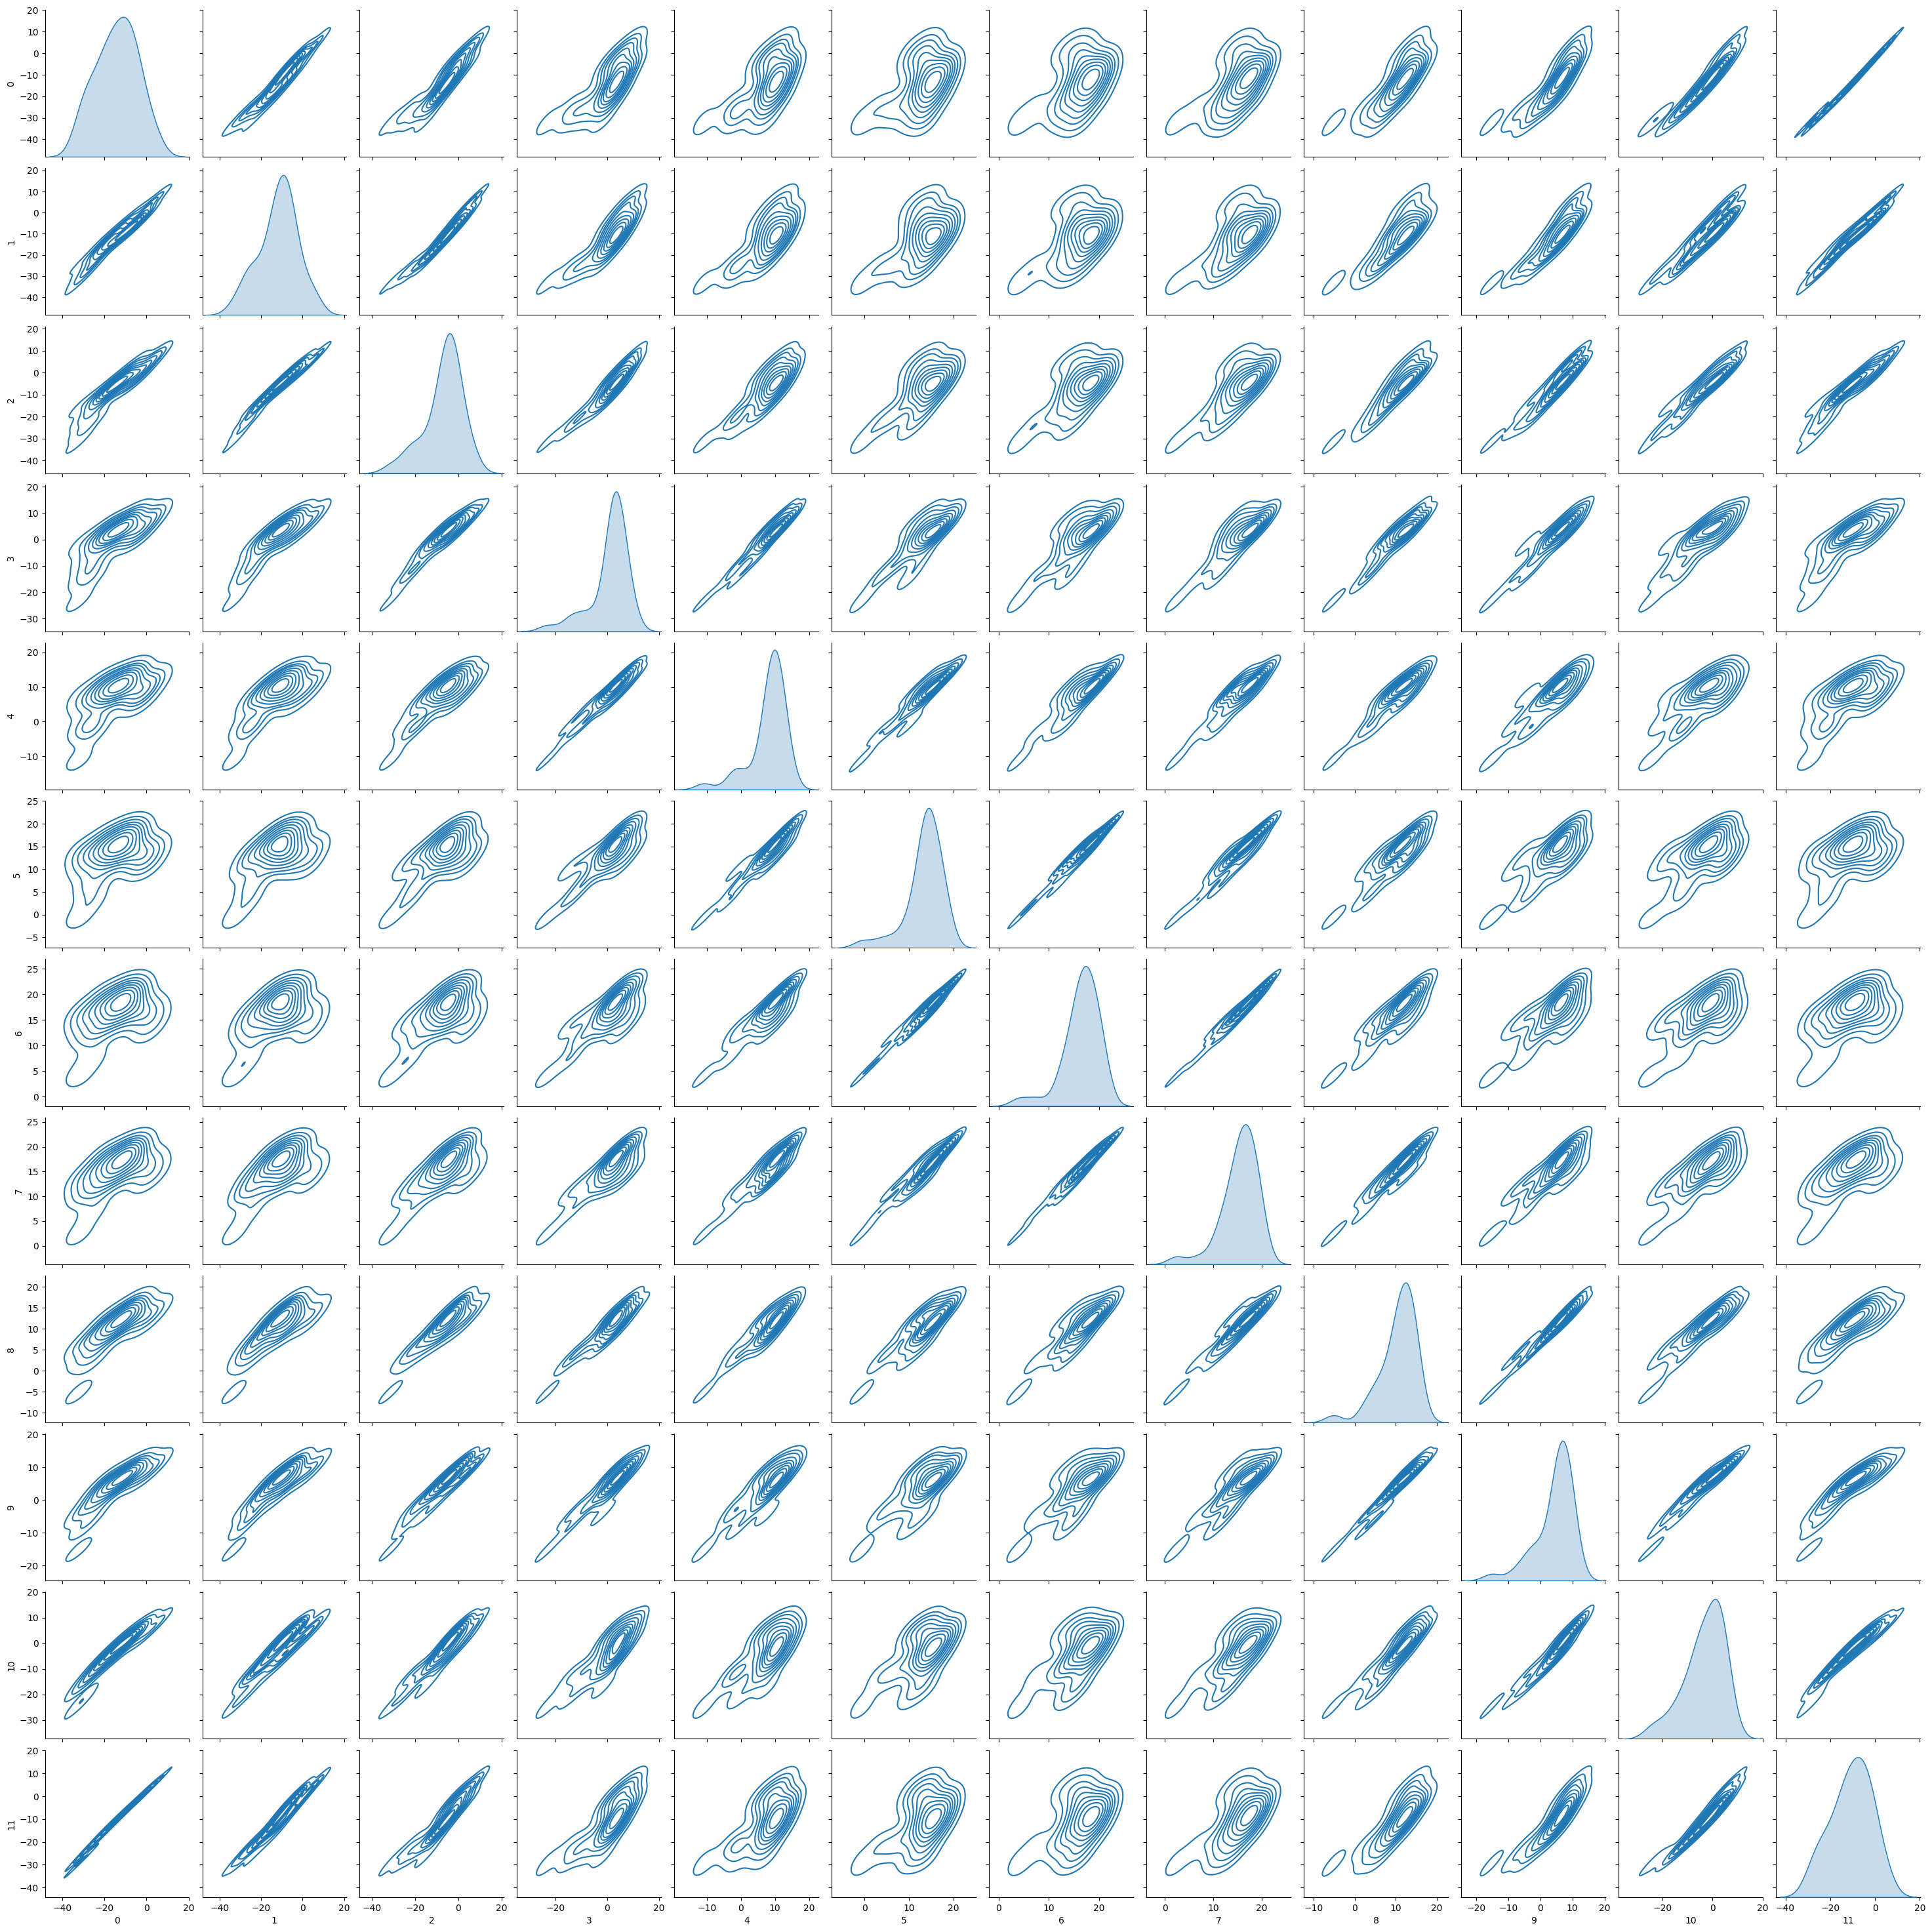

In [32]:
plt.figure(figsize=(8,8))
sns.pairplot(data, diag_kind='kde', kind='kde')
plt.show()

In [34]:
#Biplot

def mybiplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

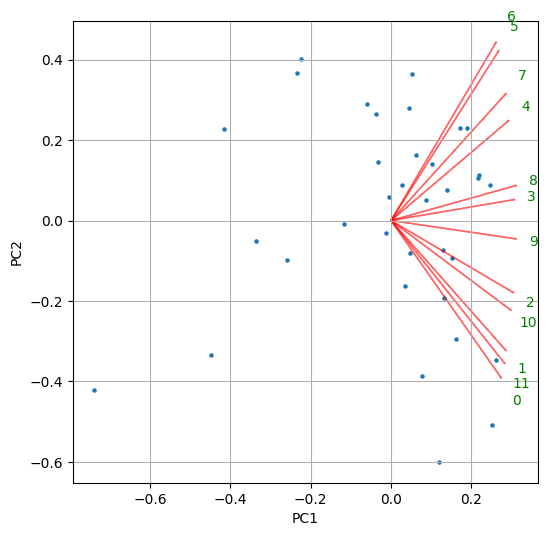

In [35]:
plt.figure(figsize=(6,6))
mybiplot(pca2[:,0:2], np.transpose(pcamodel.components_[0:2, :]), list(data.columns[:-1]))
plt.show()